In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import io

In [107]:
dogdata_w_mat = io.loadmat(os.path.join(r'C:\Users\raine\Downloads\Data Science\DATA','dogData_w.mat'))
catdata_w_mat = io.loadmat(os.path.join(r'C:\Users\raine\Downloads\Data Science\DATA','catData_w.mat'))

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

# Data Preparation
x = np.concatenate((dog_wave[:, :40],cat_wave[:, :40]),axis=1).T
x2 = np.concatenate((dog_wave[:, 40:80],cat_wave[:, 40:80]),axis=1).T

labels = np.vstack([np.hstack([np.ones(40), np.zeros(40)]),
                    np.hstack([np.zeros(40), np.ones(40)])]).T


# Neural Network Creation
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(x.shape[1],)),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='sgd',  # trainscg in MATLAB is similar to SGD in TensorFlow
            loss='BinaryCrossentropy',
            metrics=['accuracy'])

# Training
model.fit(x, labels, epochs=500)

# Evaluation
y = model.predict(x)
y2 = model.predict(x2)
performance = model.evaluate(x, labels)
performance2 = model.evaluate(x2, labels)

# Convert outputs to classes
classes2 = np.argmax(y, axis=1)
classes3 = np.argmax(y2, axis=1)

Epoch 1/500
3/3 [==============================] - 1s 5ms/step - loss: 0.8354 - accuracy: 0.5250
Epoch 2/500
3/3 [==============================] - 0s 3ms/step - loss: 0.7145 - accuracy: 0.6000
Epoch 3/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6322 - accuracy: 0.7500
Epoch 4/500
3/3 [==============================] - 0s 5ms/step - loss: 0.5712 - accuracy: 0.7375
Epoch 5/500
3/3 [==============================] - 0s 5ms/step - loss: 0.4668 - accuracy: 0.9250
Epoch 6/500
3/3 [==============================] - 0s 5ms/step - loss: 0.4333 - accuracy: 0.9375
Epoch 7/500
3/3 [==============================] - 0s 5ms/step - loss: 0.3967 - accuracy: 0.9125
Epoch 8/500
3/3 [==============================] - 0s 4ms/step - loss: 0.3602 - accuracy: 0.9625
Epoch 9/500
3/3 [==============================] - 0s 6ms/step - loss: 0.3224 - accuracy: 0.9625
Epoch 10/500
3/3 [==============================] - 0s 7ms/step - loss: 0.3514 - accuracy: 0.9625
Epoch 11/500
3/3 [===========

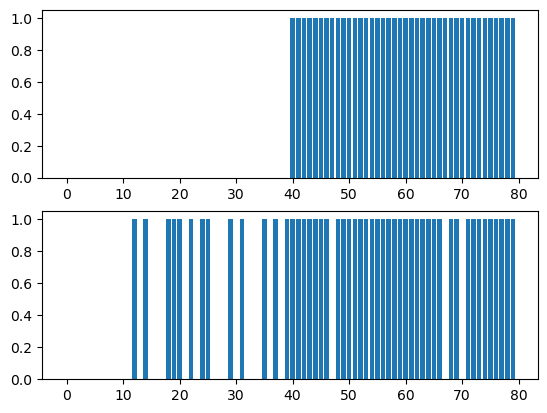

In [108]:
fig,axs = plt.subplots(2,1)
axs[0].bar(range(len(classes2)),classes2)
axs[1].bar(range(len(classes3)),classes3)


plt.show()

In [126]:
from matplotlib import image
file_path=r'C:\Users\raine\datascience\tdog.png'
img_data = image.imread(file_path)
img_data = np.mean(img_data,axis=2)
img_data = img_data.flatten()
img_data_batch = img_data.reshape(1, -1)
tdog_predicted = model.predict(img_data_batch)

1/1 [==============================] - 0s 148ms/step


In [127]:
classes_tdog = np.argmax(tdog_predicted, axis=1)